In [331]:
# This notebook contain my solution to Titanic: Machine Learning from Disaster (Kaggle 'starter' competition)
# Data can be found here: https://www.kaggle.com/c/titanic/data
# I know that my work may be quite far from ideal, as I am rather a beginner - but if you decide to actually read/analyse it
# then I hope that it will be somehow useful.
# Ok, let's say 'Hello World' to Kaggle :D

# First, libraries import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [332]:
# Loading data
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

In [333]:
# Data preview
sns.set_style('whitegrid')
train_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [334]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [335]:
# We can see that some columns have missing values - that needs to be dealt with, some columns clearly
# do not affect chances of survival - ticket number for example.
# PassangerId is probably index from database and can be dropped too.
# Cabin number is another candidate to drop - not only because its usabilty but also high number of 
# missing values, which is 687 out of 891, ~77%.
# Embarked misses some values too and port of embarkation does not seem to be useful in prediction
# but that will be investigated first.
# Name will be dropped aswell (although later as it might be useful in dealing with Age missing values).

In [336]:
train_data_cleared = train_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [337]:
# Embarked has only two missing values - such low amount can be replaced by the most frequent one
embarked_counts = train_data_cleared.groupby("Embarked").size()
embarked_counts

Embarked
C    168
Q     77
S    644
dtype: int64

In [338]:
# As we can see from above the most frequent one was Southampton
train_data_cleared["Embarked"] = train_data_cleared["Embarked"].fillna('S')

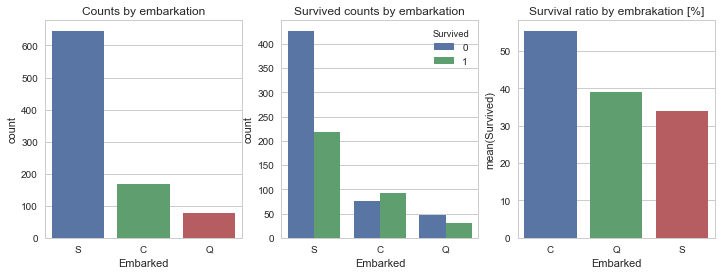

In [339]:
# Now we can do some visualization and see how embarkation port affects chances of survival
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Counts by embarkation")
sns.countplot(x='Embarked', data=train_data_cleared, ax=ax1)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Survived counts by embarkation')
sns.countplot(x='Embarked', hue='Survived', data=train_data_cleared, ax=ax2)
# At this subplot we can see that people who embarked at Cherbourg survived more frequently than others

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('Survival ratio by embrakation [%]')

surv_ratio_percentage = train_data_cleared[['Embarked', 'Survived']].groupby(
    'Embarked', as_index=False).mean()
# Due to [0,1] values in survived mean is simply percentage of survived - only thing left is
# to transorm it into percents
surv_ratio_percentage['Survived'] = surv_ratio_percentage['Survived'] * 100  
sns.barplot(x="Embarked", y='Survived', data=surv_ratio_percentage, ax=ax3)
   
plt.show()

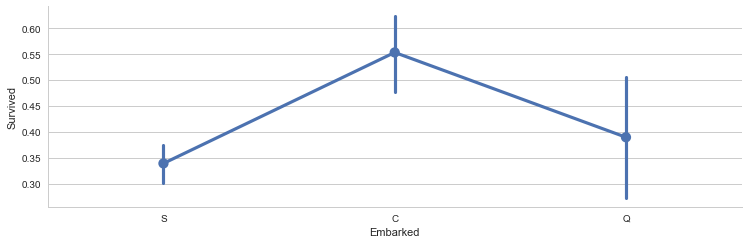

In [340]:
# To sum up - mean of survival by class:
sns.factorplot('Embarked', 'Survived', data=train_data_cleared, size=3.5, aspect=3)

In [341]:
# Looks like embarkation category may affects survival ratio and therefore won't be discarded.
# Maybe passengers embarked in that city had cabins in some place closer to lifeboats?
# Next thing to analyse is passenger class and fare he paid.
# It is almost sure that passengers from higher class will have better chances of survival - 
# the question that comes to my mind is if among class the ones that paid more were prioritized to
# rescue even in comparision to rest in the same class?
# (if so, it may be that it occurs only in 1st. class)

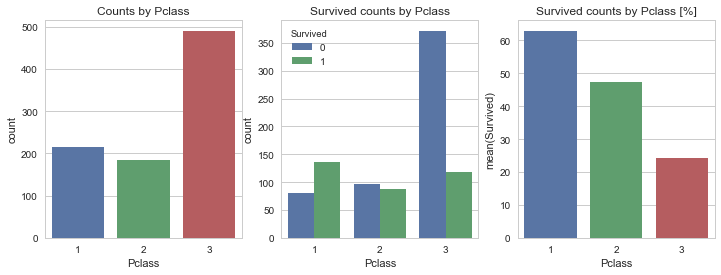

In [342]:
# Checking survival rate by pclass is similar to embarkation but code has some improvements
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.set_title('Counts by Pclass')
sns.countplot(x="Pclass", data=train_data_cleared, ax=ax1)

ax2.set_title('Survived counts by Pclass')
sns.countplot(x="Pclass", hue='Survived', data=train_data_cleared, ax=ax2)

ax3.set_title('Survived counts by Pclass [%]')
pclasses_percentage = train_data_cleared[['Pclass', 'Survived']].groupby(
    'Pclass', as_index=False).mean()
# Due to [0,1] values in survived mean is simply percentage of survived - only thing left is
# to transorm it into percents
pclasses_percentage['Survived'] = pclasses_percentage['Survived'] * 100    
sns.barplot(x="Pclass", y='Survived', data=pclasses_percentage, ax=ax3)

In [343]:
# Results are rather not surprising - the higher passenger class the higher survival rate.
# Survival rate in 1st. class is similar to the one of passengers embarked in Southampton
# - checked out of curiosity if the reason was that most of 1st. passengers embarked there but
# it is not the case according to data on wikipedia.

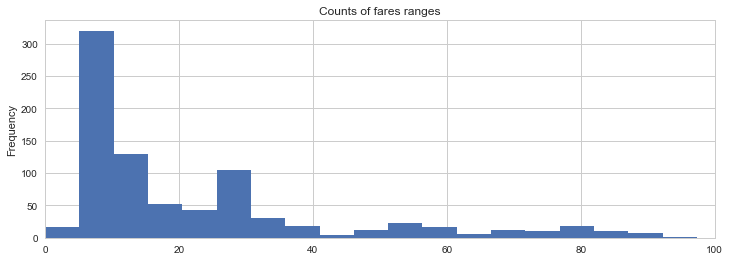

In [344]:
# Moving on to analyse fares
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title('Counts of fares ranges')

train_data_cleared["Fare"].plot(kind='hist', bins=100, xlim=(0, 100))
# There were few cases with fare above 100$ but it was only around 10 persons,
# that at the same time were making histogram really hard to read - so the limit was used.

C:\Users\ja\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


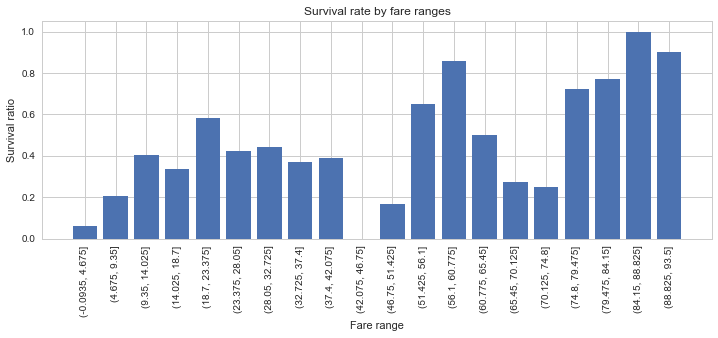

In [345]:
# But how the fare corresponds to survivability?

tmp_df = train_data_cleared[train_data_cleared['Fare'].astype(int) <= 100]
tmp_df["Fare_bin"] = pd.cut(tmp_df['Fare'], bins=20)
tmp_df = tmp_df.groupby('Fare_bin')['Survived'].mean()


x_labels = list(tmp_df.index)
plt.figure(figsize=(12, 4))
plt.bar(np.arange(len(tmp_df)), tmp_df)
plt.title('Survival rate by fare ranges')
plt.xlabel('Fare range')
plt.ylabel('Survival ratio')
plt.xticks(np.arange(20), x_labels, rotation='vertical')
plt.show()

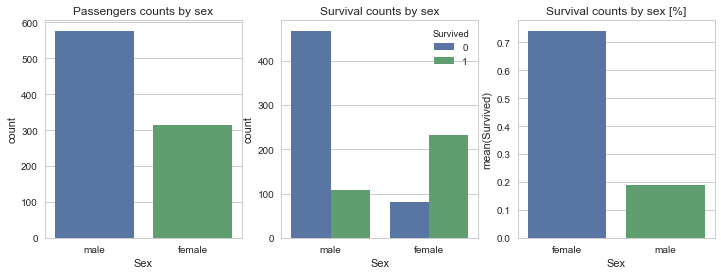

In [346]:
# From the results above we can read that survival rate varies but people with lowest/highest fares have 
# respectively lower/higher survival rates.
# Now let's see how survival rate is distributed among sexes.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.set_title('Passengers counts by sex')
sns.countplot(train_data_cleared['Sex'], data=train_data_cleared, ax=ax1)

ax2.set_title('Survival counts by sex')
sns.countplot(x='Sex', data=train_data_cleared, hue='Survived', ax=ax2)

ax3.set_title('Survival counts by sex [%]')
sex_survival_rates = train_data_cleared[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
sns.barplot(x='Sex', 
            y='Survived', data=sex_survival_rates, ax=ax3)

In [347]:
# Well, what can we say, male passengers were more frequent on the ship and they survival ratio
# is rather low while slogan "Women and children first" is not a joke.

In [348]:
# The time has come to finally deal with our last column containing missing values: 'Age'
# and after that analyse it.
# After looking into a data we can find some pattern in 'Name' column - males up to 13-15yo are called
# Master instead of Mr.
# We can use it and replace missing age values using that information, unfortunetely there is
# no such pattern in case o females, or something that could help us in case of older men.
# In that cases we will simply use mean (eventually with some addidion of random number from 0 up to std).

master_df = train_data_cleared[train_data_cleared['Name'].str.contains('Master|master')]['Age']
master_mean = master_df.mean()
master_null_count = train_data_cleared[(train_data_cleared['Name'].str.contains('Master|master')) & 
                                 (train_data_cleared['Age'].isnull())].shape[0]

#Well, master_null_count is only 4 but it is still something that need to be dealt with.

#rand_nums_master = [master_mean for i in range(0, master_null_count)]
train_data_cleared.loc[(train_data_cleared['Name'].str.contains('Master|master')) & 
                                 (train_data_cleared['Age'].isnull()), 'Age'] = master_mean

# Ok, now let's get the job (simplified, just using mean for each sex) done for the other men and women.
adult_men_df = train_data_cleared[(train_data_cleared['Sex'] == 'male') &
                                    ~(train_data_cleared['Name'].str.contains('Master|master'))]["Age"]

adult_men_mean = adult_men_df.mean()
train_data_cleared.loc[(train_data_cleared['Sex'] == 'male') &
                                    ~(train_data_cleared['Name'].str.contains('Master|master')
                                     ) & (train_data_cleared['Age'].isnull()), 'Age'] =  adult_men_mean

train_data_cleared[(train_data_cleared['Age'].isnull())].shape[0] # just a check of remaining nulls

53

In [349]:
# Firstly, I wanted to replace the missing values using random numbers and mean/std, but
# in the end just ordinary mean was used.
# Women missing ages still needs to treated and the method will be the same.

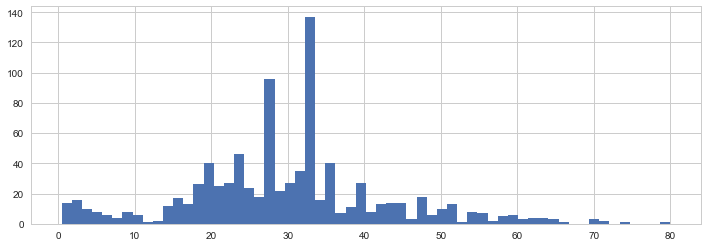

In [350]:
women_mean = train_data_cleared.loc[(train_data_cleared['Sex'] == 'female'), 'Age'].mean()
train_data_cleared.loc[(train_data_cleared['Age'].isnull()), 'Age'] = women_mean

# Done, we can visualize it age distribution now.
fig, ax1 = plt.subplots(1, 1, figsize=(12,4))
train_data_cleared['Age'].hist(bins=60, ax=ax1)

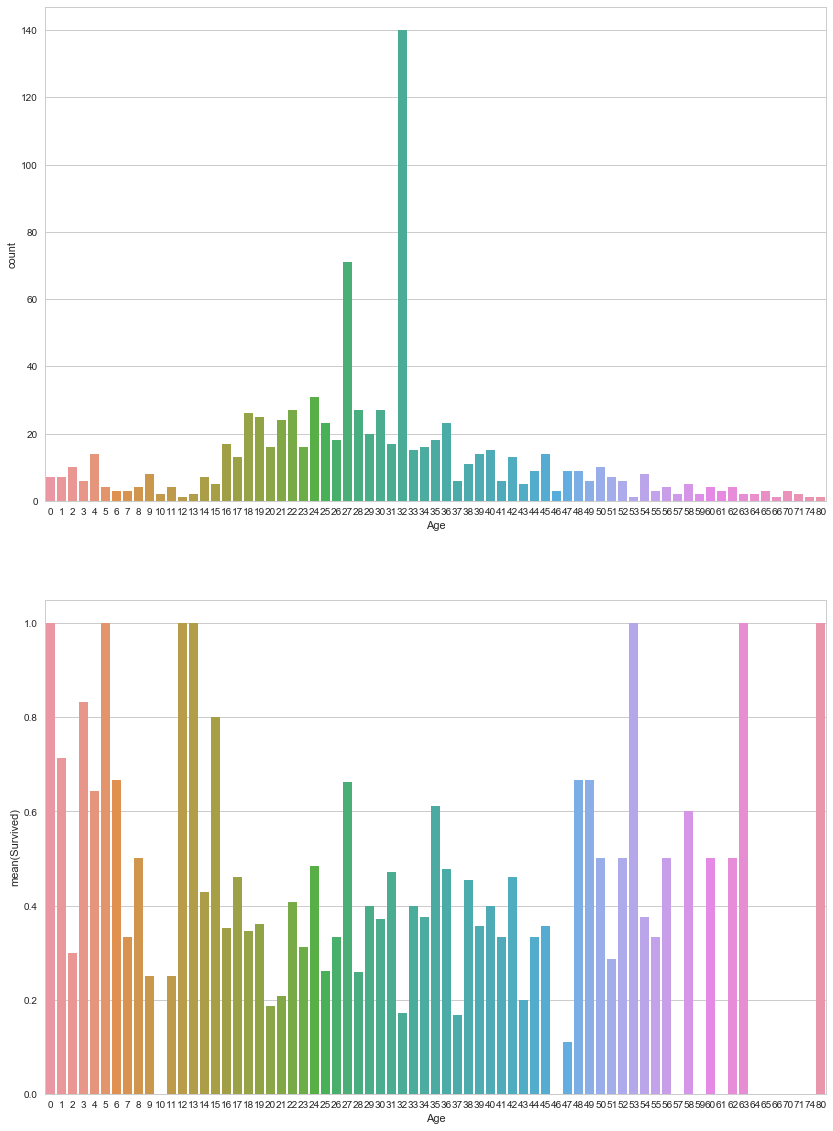

In [351]:
# The two highest bars are for sure inflated - as a result of replacing nulls with mean.
# How does survival rates look in different age groups?
# To get the better idea I will try to show both survival rate and counts, actually we can use
# bins with size of 1 year.

train_data_cleared['Age'] = train_data_cleared['Age'].astype(int)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 20))
sns.countplot(x=train_data_cleared['Age'], ax=ax1)
sns.barplot(x='Age', y='Survived', data=train_data_cleared[['Age', 'Survived']].groupby(
    'Age', as_index=False).mean())

In [352]:
# We can see that the left side of our age/mean(survival) plot, survival rates are quite good,
# and higher than average.
# On the first look survival rates of old pesengers seemed good, but after a moment I saw that
# area with zero surival rate.
# The reason is of such 0 or 100% distribution of survival in the group of elders is
# probably the fact , that this group is rather small and 2-3 persons are sometimes all in bin 
# The children group on the other hand has greater quantity and may be worth to be treated specially
# in some way (separate column? rather not, better idea might be to distinquish it in 'Sex' 
# column as child)

In [353]:
def get_new_sex(data): 
    sex, age = data
    return 'child' if age <= 15 else sex

train_data_cleared.loc[:,'Sex'] = train_data_cleared[['Sex', 'Age']].apply(get_new_sex,
    axis=1)

# Well, child is not actually a sex, but I have no idea how to name it.
# Now, after we have dealt with age we can get rid of now unnecessary 'Name' column.
train_data_cleared = train_data_cleared.drop('Name', 1)
train_data_cleared.head(5)

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    male   22      1      0   7.2500        S
1         1       1  female   38      1      0  71.2833        C
2         1       3  female   26      0      0   7.9250        S
3         1       1  female   35      1      0  53.1000        S
4         0       3    male   35      0      0   8.0500        S

In [354]:
# Last thing to deal with are columns SibSp and Parch - according to introduction they are respectively:
'''
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
'''
# I would like to first simplify this to one column - as number of family_members onboard.

'\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\n\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.\n'

In [355]:
train_data_cleared['FamMembers'] = train_data_cleared['SibSp'] + train_data_cleared['Parch']
train_data_cleared = train_data_cleared.drop(['SibSp', 'Parch'], axis=1)

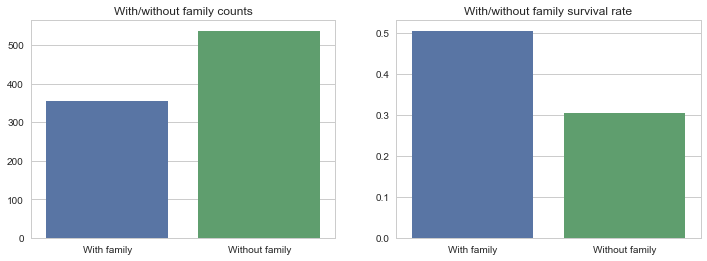

In [356]:
# Let's see how counts/survival rate of passengers with/without family looks like.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
counts_names = ['With family', 'Without family']
with_family = train_data_cleared['FamMembers'] > 0
with_family_count = train_data_cleared[with_family].shape[0]
without_family_count = train_data_cleared.shape[0] - with_family_count

ax1.set_title('With/without family counts')
sns.barplot(x=counts_names, y=[with_family_count, without_family_count], ax=ax1)

with_survived_cnt = train_data_cleared[(with_family) & (train_data_cleared['Survived'] == 1)].shape[0]
without_survived_cnt = train_data_cleared[~(with_family) & (train_data_cleared['Survived'] == 1)].shape[0]

ax2.set_title('With/without family survival rate')
sns.barplot(x=counts_names, y=[with_survived_cnt / with_family_count,
                               without_survived_cnt / without_family_count], ax=ax2)

In [357]:
# We see that onboard were more people without family - the ones with family have greater survival
# rates. 
# Does higher number of family members onboard positively/negatively affect survival rate?

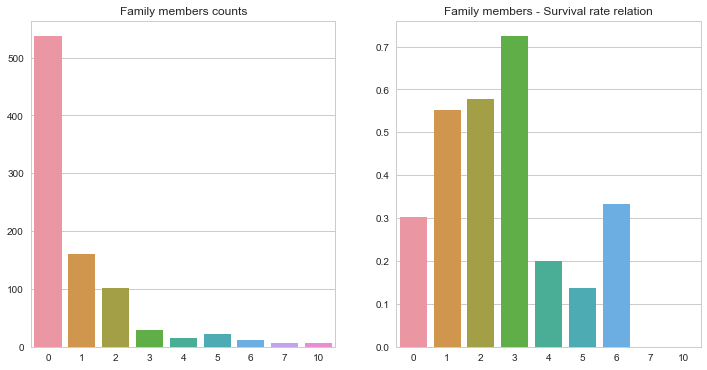

In [358]:
fam_mem_numbers = list(np.arange(0, max(train_data_cleared['FamMembers']) + 1, 1))

survival_rates = []
total_counts = []
to_delete = []
for num in fam_mem_numbers:
    total_count = train_data_cleared[train_data_cleared['FamMembers'] == num].shape[0]
    survived_count = train_data_cleared[(train_data_cleared['FamMembers'] == num) & 
                                       (train_data_cleared['Survived'] == 1)].shape[0]
    if total_count != 0:
        sur_rate = survived_count / total_count
        survival_rates.append(sur_rate)
        total_counts.append(total_count)
    else:
        to_delete.append(num)

for item in to_delete:
    fam_mem_numbers.remove(item)
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Family members counts')
sns.barplot(x=fam_mem_numbers, y=total_counts, ax=ax1)
ax2.set_title('Family members - Survival rate relation')
sns.barplot(x=fam_mem_numbers, y=survival_rates, ax=ax2)

In [359]:
# We can see that to some extent the greater amount of family onboard - the greater survival chances
# But at some point (but this data is a bit uncertain due to low amount of samples) chances drop down
# suddenly and are affected rather negatively.
# I'm uncertain about leaving it the way it is and bringing it to 0/1 for not having/having
# family on board.
# After all we will give it a shot as it is.

In [360]:
# For now everything is analysed/visualized and prepared/cleaned - in case of train dataset, in 
# next few cells test dataset will proccesed the same way.

In [361]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [362]:
test_data_cleared = test_data.drop(['Ticket', 'Cabin'], axis=1)

# Handling missing (only one) fare value - that passenger travel in class 3 and median of this class will be used
test_data_cleared.loc[test_data['Fare'].isnull(), 'Fare'] = test_data[
    test_data['Pclass'] == 3]['Fare'].median()

# Family members
test_data_cleared['FamMembers'] = test_data_cleared['SibSp'] + test_data_cleared['Parch']
test_data_cleared.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# All operations related to age
master_mean = test_data_cleared[(test_data_cleared['Name'].str.contains('Master|master'))]['Age'].mean()
adult_men_mean = test_data_cleared[~(test_data_cleared['Name'].str.contains('Master|master'))][
    'Age'].mean()
women_mean = test_data_cleared[test_data_cleared['Sex'] == 'female']['Age'].mean()

test_data_cleared.loc[(test_data_cleared['Sex'] == 'female') & (test_data_cleared['Age'].isnull()),
                       'Age'] = women_mean
test_data_cleared.loc[test_data_cleared['Name'].str.contains('Master|master') & (
    test_data_cleared['Age'].isnull()), 'Age'] = master_mean
test_data_cleared.loc[test_data_cleared['Age'].isnull(), 'Age'] = adult_men_mean
test_data_cleared['Age'] = test_data_cleared['Age'].astype(int)

test_data_cleared.loc[test_data_cleared['Age'] <= 15, 'Sex'] = 'child'

# Dropping unnecessary columns (ids kept for future results saving purposes)
test_data_pass_ids = test_data_cleared['PassengerId']
test_data_cleared.drop(['Name', 'PassengerId'], axis=1, inplace=True)

# Correction check up
test_data_cleared.info()
train_data_cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass        418 non-null int64
Sex           418 non-null object
Age           418 non-null int32
Fare          418 non-null float64
Embarked      418 non-null object
FamMembers    418 non-null int64
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 18.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null int32
Fare          891 non-null float64
Embarked      891 non-null object
FamMembers    891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.3+ KB


In [363]:
# Now it is time to get data ready for actual ML.

In [364]:
# There is one more thing to do - we need to get rid of string values (columns 'Sex'
# and 'Embarked'), as scikit does not allow them and works only on floats.
# As it is categorical data we need to do encoding properly (one of k) and be careful
# to avoid 'Dummy Variable trap' (although scikit would handle it eventually by itself
# as far as I know)

In [365]:
# Getting data in form of numpy array
train_data = train_data_cleared.as_matrix()
test_data = test_data_cleared.as_matrix()
train_correct = train_data[:, 0]
train_data = train_data[:, 1:]

In [366]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
train_data[:, 1] = labelencoder.fit_transform(train_data[:, 1])
test_data[:, 1] = labelencoder.transform(test_data[:, 1])

labelencoder = LabelEncoder()
train_data[:, 4] = labelencoder.fit_transform(train_data[:, 4])
test_data[:, 4] = labelencoder.transform(test_data[:, 4])

In [367]:
# Of course now we have a situation in which our model will treat city encoded by 3 as more significant
# than city encoded by 2 - which is wrong and need to by dealt with.
# We will use one hot encoding to prevent that.

In [368]:
onehotencoder = OneHotEncoder(categorical_features = [1])
train_data = onehotencoder.fit_transform(train_data).toarray()
test_data = onehotencoder.transform(test_data).toarray()

# We should remember about dummy variable trap - the fact that array 
# after transforming by one hot encoder returns newly encoded columns 
# as a first columns makes it quite comfortable to handle.

train_data = train_data[:, 1:]
test_data = test_data[:, 1:]

# Analogical operations for 'Embarked' column
onehotencoder = OneHotEncoder(categorical_features = [5])
train_data = onehotencoder.fit_transform(train_data).toarray()
test_data = onehotencoder.transform(test_data).toarray()

train_data = train_data[:, 1:]
test_data = test_data[:, 1:]

# And lastly 'pclass column
onehotencoder = OneHotEncoder(categorical_features = [4])
train_data = onehotencoder.fit_transform(train_data).toarray()
test_data = onehotencoder.transform(test_data).toarray()

train_data = train_data[:, 1:]
test_data = test_data[:, 1:]

In [369]:
# Preparing finally done.
# Now I will split train dataset into train/test set and test it against some models,
# depending on results I will pick the best, then train it again with all my data and use
# it on final test set from test.csv.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_data, 
                                                   train_correct, test_size=0.17,
                                                   random_state=0)

# Lastly - there was an error in later sections caused by 'object' data type of 
# observations labels, so I will convert it here
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [370]:
# Like I mentioned I'm a rather a novice myself so I will test as many models as posible (mainly just out of curiosity).
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [371]:
# Logisitic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
logistic_regression.score(X_test, Y_test)

0.82894736842105265

In [372]:
# We gotpredictions from first model ~83% of accuracy which is quite good but could be better.
# (Well, it's deinitely exceeds a monkey that choses randomly ^^)
# But let's test out other algorithms and models.

In [373]:
# SVC
svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.73026315789473684

In [374]:
# linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
linear_svc.score(X_test, Y_test)

0.82894736842105265

In [375]:
# Support Vector Classification gives worse results, but let's move on.

In [376]:
# Gaussian Naive Bayes
gaussian_NB = GaussianNB()
gaussian_NB.fit(X_train, Y_train)
gaussian_NB.score(X_test, Y_test)

0.82894736842105265

In [377]:
# K nearest neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
knn_classifier.score(X_test, Y_test)

0.73026315789473684

In [378]:
# Deision Tree
dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train, Y_train)
dtree_classifier.score(X_test, Y_test)

0.80921052631578949

In [379]:
# And last but not least, classifier that will probably have the best output.
# Random Forest
rand_forest_classifier = RandomForestClassifier(n_estimators=200)
rand_forest_classifier.fit(X_train, Y_train)
rand_forest_classifier.score(X_test, Y_test)

0.86184210526315785

In [380]:
# Well, around 84-85%, which is not so bad I think.
# (and definitely better that mentioned earlier monkey ^^)

In [381]:
# Time for final results
rand_forest_classifier = RandomForestClassifier(n_estimators=200)
rand_forest_classifier.fit(train_data, train_correct.astype(int))
results = rand_forest_classifier.predict(test_data)
results

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [382]:
# Description says submission should be in PassngerId, Predicted Survival output.
results_df = pd.DataFrame({'PassengerId': test_data_pass_ids, 'Survived': results})
results_df.to_csv('titanic_results.csv', index=False)

In [384]:
# test
rand_forest_classifier = RandomForestClassifier(n_estimators=200, max_depth=10)
rand_forest_classifier.fit(X_train, Y_train)
rand_forest_classifier.score(X_test, Y_test)

0.86184210526315785

Feature ranking:
1. feature 5 (0.226984)
2. feature 7 (0.226616)
3. feature 6 (0.204493)
4. feature 4 (0.128984)
5. feature 8 (0.088803)
6. feature 1 (0.069831)
7. feature 3 (0.022731)
8. feature 0 (0.019944)
9. feature 2 (0.011614)


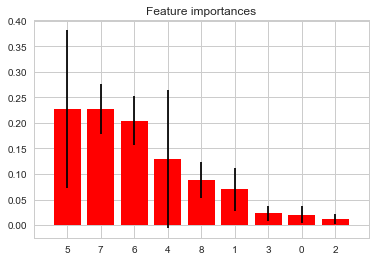

In [385]:
# Bonus: We have model and predictions already, now out of curiosity a little check of features importance.
importances = rand_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()